# Height - Weight

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/CSE4020_ML

/content/gdrive/My Drive/CSE4020_ML


In [ ]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df = df.drop(columns=['Gender'])

## Relation between Label and Features

Text(0, 0.5, 'Height')

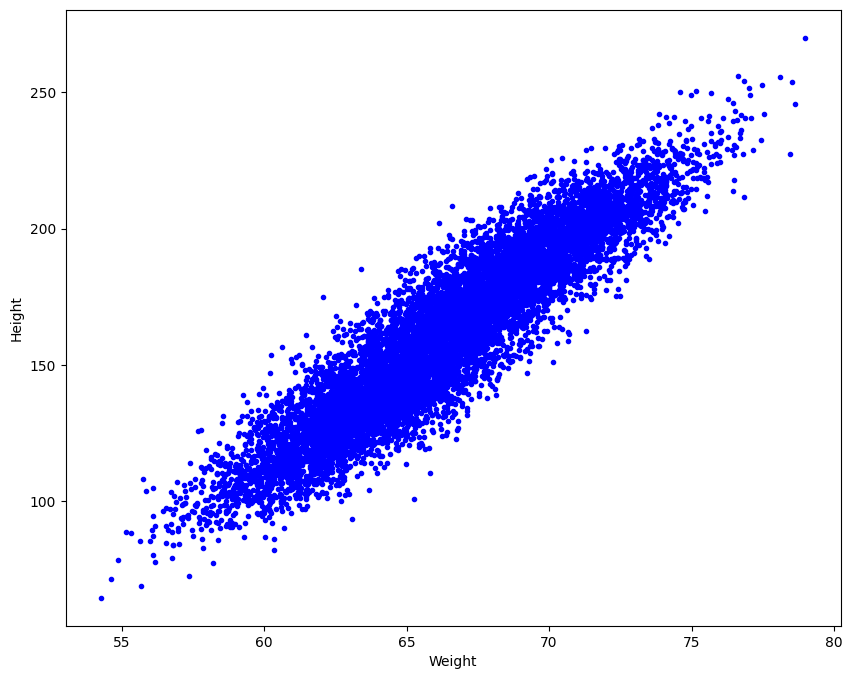

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(df['Height'], df['Weight'], 'b.')
plt.xlabel('Weight')
plt.ylabel('Height')



## Separate Label and Features

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
X



array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [ ]:
y

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

## Split Train and Test data

In [ ]:
# This is for normalizing all the columns to be in certain range
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

array([[61.39164365],
       [74.6976372 ],
       [68.50781491],
       ...,
       [64.3254058 ],
       [69.07449203],
       [67.58883983]])

In [ ]:
y_train

array([120.68190655, 209.37312588, 200.87727946, ..., 156.80050358,
       179.38681672, 150.38059744])

## Define the Model

In [ ]:
class LinearRegression() :
  def __init__(self, iterations, learningRate) :
    self.iterations = iterations
    self.learningRate = learningRate

  def modelFit(self, X, y) :
    self.m = len(X)
    self.weights = 0
    self.c = 0  # bias
    self.X = X #store as attributes to make it more accesible for other methods in the object
    self.y = y

    for i in range(self.iterations) :
      self.gradientDecent()

    return self

  def gradientDecent(self) :
    y_pred = self.X * self.weights + self.c
    dcost = -(np.sum((self.X) * (self.y - y_pred))) / self.m
    dc = -np.sum(self.y - y_pred) / self.m
    self.weights = self.weights - self.learningRate * dcost / self.m
    self.c = self.c - self.learningRate * dc / self.m

  def predict(self, X) :
    return X * (self.weights) + self.c

    return self

## Fit the Model

In [ ]:
model = LinearRegression(100, 0.01)
model.modelFit(X_train, y_train)
pred = model.predict(X_test)
                     
print("Predicted values ", pred[:3])
      
print("Real values      ", y_test[:3])
      
print("Trained Weight   ", model.weights)
      
print("Trained C        ", model.c)

Predicted values  [[-5.80072976e+165]
 [-5.81272780e+165]
 [-5.60745410e+165]]
Real values       [173.11581259 195.1620421  170.21745116]
Trained Weight    -8.443289206721452e+163
Trained C         -1.2680947426057668e+162


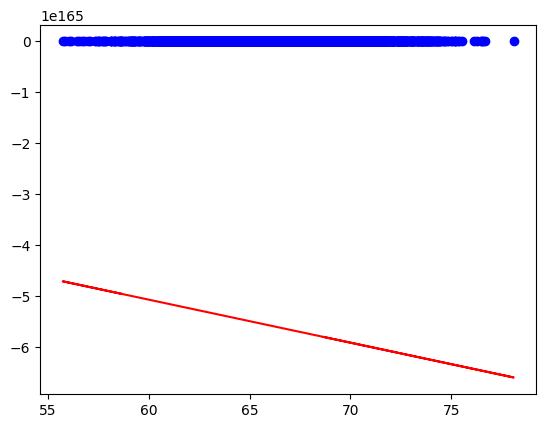

In [ ]:
plt.scatter(X_test, y_test, color = 'blue' )
plt.plot( X_test, pred, color = 'red' )
      
plt.show()

Predicted values  [179.25 180.35 161.62 204.23 166.59]
Real values       [173.11581259 195.1620421  170.21745116 215.04965996 182.72145243]


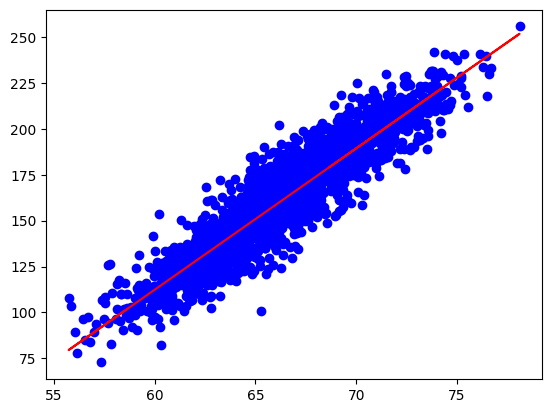

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print( "Predicted values ", np.round(pred[:5], 2 )) 
print( "Real values      ", y_test[:5] )
plt.scatter(X_test, y_test, color = 'blue' )
plt.plot( X_test, pred, color = 'red' )
      
plt.show()

# House Prices
